     |████████████████████████████████| 31.2MB 102kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.3
    Uninstalling scipy-1.3.3:
      Successfully uninstalled scipy-1.3.3
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


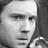

Angry


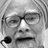

Angry


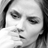

Fear


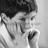

Sad


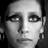

Neutral


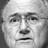

Fear


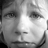

Sad


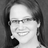

Happy


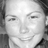

Happy


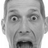

Fear


Using TensorFlow backend.


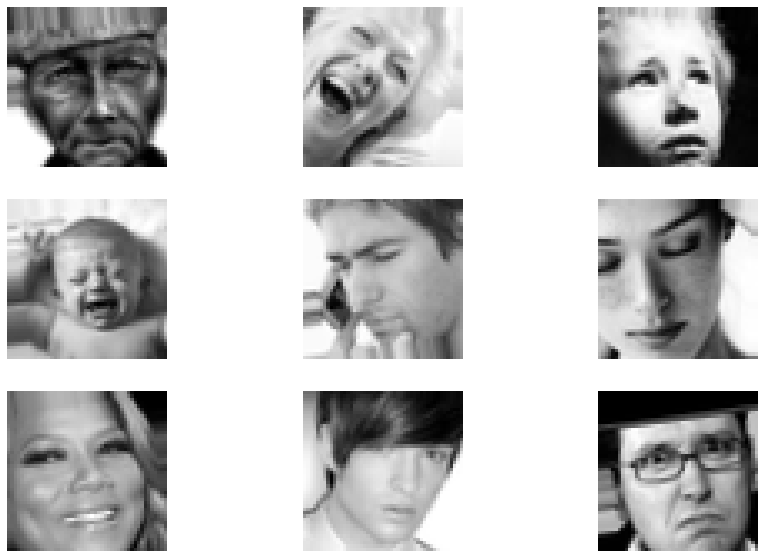

In [3]:
# 최신버전의 scipy는 toimage를 지원 하지 않아서 낮은 버전을 다운받는다.
!pip install scipy==1.1.0

# colab setting
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
from matplotlib import pyplot
import scipy.misc 
from math import sqrt 
import itertools
from IPython.display import display
%matplotlib inline

# 데이터셋 로드.
data= pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fer2013.csv')
data.head()

# matplotlib.pylab의 rcParams 설정을 활용하면, 
# 차트의 크기와 선의 색, 두께등의 기본 값을 설정할 수 있다.
# 그림(figure)의 크기. (가로,세로) 인치 단위
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# 정답 out put 7열
num_classes = 7

# 이미지 크기 전역변수 저장
width = 48
height = 48

# 0:분노 / 1:싫음 / 2:공포 / 3:행복 / 4:슬픔 / 5:놀람 / 6:중립
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
classes=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))
data.Usage.value_counts() 

###### 정답 데이터 시각화 ######
depth = 1
height = int(sqrt(len(data.pixels[0].split()))) 
width = int(height)
for i in range(0, 10): 
    array = np.mat(data.pixels[i]).reshape(height, width) 
    image = scipy.misc.toimage(array, cmin=0.0)
    display(image)
    print(emotion_labels[data.emotion[i]]) 

## Dataset Split ##
train_set = data[(data.Usage == 'Training')] 
X_train = np.array(list(map(str.split, train_set.pixels)), np.float32) 
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

val_set = data[(data.Usage == 'PublicTest')]
X_val = np.array(list(map(str.split, val_set.pixels)), np.float32) 
X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)

test_set = data[(data.Usage == 'PrivateTest')] 
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32) 
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

# train, validation, test set 데이터 갯수
# train = 28709개
# val = 3589개
# test = 3589개
# image shape = 48*48*1
num_train = X_train.shape[0]
num_val = X_val.shape[0]
num_test = X_test.shape[0]

### one - hot incoding ###
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 
y_train = train_set.emotion 
y_train = np_utils.to_categorical(y_train, num_classes) 
y_val = val_set.emotion 
y_val = np_utils.to_categorical(y_val, num_classes) 
y_test = test_set.emotion 
y_test = np_utils.to_categorical(y_test, num_classes)

########### ImageDataGenerator를 이용해서 데이터를 부풀린다. ############
datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

testgen = ImageDataGenerator( 
    rescale=1./255
    )
datagen.fit(X_train)
batch_size = 64

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9): 
        pyplot.axis('off') 
        pyplot.subplot(330 + 1 + i) 
        pyplot.imshow(X_batch[i].reshape(48, 48), cmap=pyplot.get_cmap('gray'))
    pyplot.axis('off') 
    pyplot.show() 
    break

### ImageDataGenerator
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size) 
val_flow = testgen.flow(X_val, y_val, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Epoch 1/100
Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.98931, saving model to weight_minloss.hdf5
449/448 - 37s - loss: 2.5456 - acc: 0.2103 - val_loss: 1.9893 - val_acc: 0.2477
Epoch 2/100
Epoch 1/100

Epoch 00002: val_loss did not improve from 1.98931
449/448 - 24s - loss: 2.1245 - acc: 0.2431 - val_loss: 2.0082 - val_acc: 0.2257
Epoch 3/100
Epoch 1/100

Epoch 00003: val_loss improved from 1.98931 to 1.92609, saving model to weight_minloss.hdf5
449/448 - 25s - loss: 2.0703 - acc: 0.2565 - val_loss: 1.9261 - val_acc: 0.2708
Epoch 4/100
Epoch 1/100

Epoch 00004: val_loss improved from 1.92609 to 1.80757, saving model to weight_minloss.hdf5
449/448 - 25s - loss: 1.9916 - acc: 0.2825 - val_loss: 1.8076 - val_acc: 0.3383
Epoch 5/100
Epoch 1/100

Epoch 00005: val_loss did not improve from 1.80757
449/448 - 24s - loss: 1.9025 - acc: 0.3186 - val_loss: 2.5978 - val_acc: 0.2572
Epoch 6/100
Epoch 1/

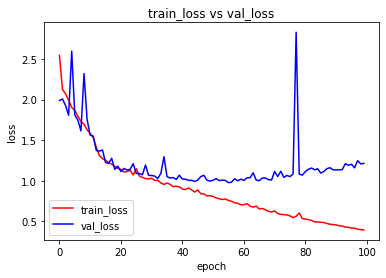

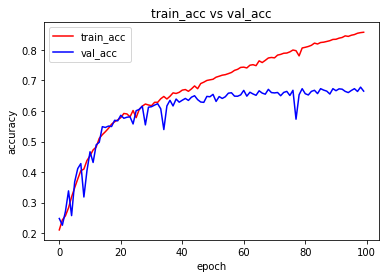

<Figure size 432x288 with 0 Axes>

In [4]:
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt


num_features = 64
num_labels = 7
width, height = 48, 48

model = models.Sequential()


################ MODEL START ###################
# input 
model.add(layers.Conv2D(num_features, kernel_size=3, activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))

################ HIDDEN L1 ###################
model.add(layers.Conv2D(num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

################ HIDDEN L2 ###################
model.add(layers.Conv2D(2*num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

################ HIDDEN L3 ###################
model.add(layers.Conv2D(2*2*num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*2*num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*2*num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*2*num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

################ HIDDEN L4 ###################
model.add(layers.Conv2D(2*2*num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*2*num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*2*num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*2*num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

################ HIDDEN L5 ###################
model.add(layers.Conv2D(2*2*2*num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*2*2*num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*2*2*num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(2*2*2*num_features, kernel_size=3, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

################ OUT PUT ###################
model.add(layers.Flatten())
model.add(layers.Dense(num_labels, activation='softmax'))


# bet_1, beta_2 = 모멘텀과 관련된 파라미터.
# decay = learning late 점점 줄여주는 비율
model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.Adam(lr=0.0001, decay=1e-6),
              #optimizer=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=1e-6),
              metrics=['accuracy'])

# 모델 저장 callback 함수
from keras.callbacks import ModelCheckpoint
filepath="weight_minloss.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# training the model
# 하이퍼 파라미터
# steps_per_epoch = 한 번 epoch 돌 때, 데이터를 몇 번 볼 것인가를 정해준다.
# verbose = 2 주피터 노트북 전용 옵션, callbacks = 모델 저장 옵션을 지정
num_epochs = 100
history = model.fit_generator(train_flow, 
                    steps_per_epoch=len(X_train) / batch_size, 
                    epochs=num_epochs,  
                    verbose=2,  
                    callbacks=callbacks_list,
                    validation_data=val_flow,  
                    validation_steps=len(X_val) / batch_size)

%matplotlib inline

train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['acc']
val_acc=history.history['val_acc']

epochs = range(len(train_acc))

### echoc 정확도 변화 시각화 ###
plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.figure()

# flow data를 평가해주는 함수 evaluate_generator로 테스트 데이터셋 최종 정확도 출력
loss = model.evaluate_generator(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(loss[0]))
print("Test Acc: " + str(loss[1]))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(48, 48)


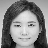

(48, 48)


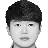

(48, 48)


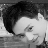

(48, 48)


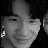

(48, 48)


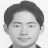

(48, 48)


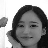

[[0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0. 0.]]


In [49]:
# colab setting
from google.colab import drive
drive.mount('/content/gdrive')

from PIL import Image, ImageOps
import numpy

namelst = ['겨레','상국','광현','석호','재원','은아']
ndarray_lst = []


def color_to_grey(filename):
    image = Image.open(f'/content/gdrive/My Drive/Colab Notebooks/{filename}.png').convert('L')
    image.save(f'/content/gdrive/My Drive/Colab Notebooks/{filename}_greyscale.png')
    image=image.resize((48, 48))
    print(image.size)
    display(image)
    ndarray_lst.append(numpy.array(image, dtype='f'))

for name in namelst:
    color_to_grey(name)

for i in range(len(namelst)) :
    ndarray_lst.append(ndarray_lst[i].reshape(48, 48))

# 현재 모델로 조원 사진 예측!
for i in range(len(namelst)) :
    print(model.predict(ndarray_lst[i].reshape(1,48,48,1)))
